In [99]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
dtype = {'file': str,
         'block': str,
         'tokens': str,
         'subject': str,
         'duration': int,
         'nSFD': float,
         'nFFD': float,
         'nGD': float,
         'nTT': float,
         'PrF': float,
         'Pr1': float,
         'Pr2': float,
         'PrS': float,
         'length': int,
         'wpm': float}

df = pd.read_csv("eight_metrics_block_level.csv", dtype=dtype)

In [155]:
df = df[(df['subject'] == '215') | (df['subject'] == '180')]

In [156]:
df.head()

,file,block,tokens,subject,duration,nSFD,nFFD,nGD,nTT,PrF,Pr1,Pr2,PrS,length,wpm
2086,11,2,NaN,180,8372,NaN,48.125932,53.090424,87.210507,0.718750,0.343750,0.375000,0.281250,32,229.335882
2087,11,1,NaN,180,1128,NaN,42.523810,42.523810,118.476190,1.000000,0.000000,1.000000,0.000000,2,106.382979
2088,11,3,NaN,180,10180,NaN,64.185684,65.099145,121.023504,0.722222,0.250000,0.472222,0.277778,36,212.180747
2089,11,4,NaN,180,3765,NaN,34.116270,36.618254,58.768552,0.428571,0.142857,0.285714,0.571429,28,446.215139
2090,11,5,NaN,180,7421,NaN,53.146627,54.757738,100.157407,0.600000,0.166667,0.433333,0.400000,30,242.554912


In [157]:
data = df[['nFFD', 'nGD', 'nTT', 'PrF', 'Pr1', 'Pr2', 'PrS', 'wpm']]
target = df['subject']

### Drop High Correlated Features

In [158]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [159]:
data = data.drop(data[to_drop], axis=1)

### Scale Data Using StandardScaler

In [160]:
data = pd.DataFrame(data=StandardScaler().fit_transform(data), columns=data.columns, index=data.index)

In [161]:
data.head()

,nFFD,nTT,PrF,Pr1,Pr2,wpm
2086,-0.443921,-0.690919,0.013536,0.759267,-0.573793,0.151548
2087,-0.819144,0.226226,2.424919,-2.105062,3.431296,-1.440285
2088,0.631739,0.300949,0.043307,-0.021914,0.049220,-0.070555
2089,-1.382270,-1.525233,-2.474398,-0.914691,-1.145949,2.959415
2090,-0.107642,-0.311136,-1.004603,-0.716296,-0.199985,0.322690


### Train Test Split

In [162]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.2)

In [163]:
print("train data:", train_data.shape)
print("train data:", test_data.shape)
print('train target:', train_target.shape)
print('test target:', test_target.shape)

train data: (189, 6)
train data: (48, 6)
train target: (189,)
test target: (48,)


### Use Random Forest to Train the Data

In [164]:
clf = RandomForestClassifier()

clf.fit(train_data, train_target)

RandomForestClassifier()

### Cross Validation

In [165]:
# Accuracy
statistics.mean(cross_val_score(clf, train_data, train_target, cv=10, scoring="accuracy"))

0.671345029239766

In [166]:
test_predict = cross_val_predict(clf, test_data, test_target, cv=10)

In [168]:
precision_score(test_target, test_predict, pos_label='215')

0.4666666666666667

In [146]:
recall_score(test_target, test_predict, pos_label='314')

0.4

In [147]:
f1_score(test_target, test_predict, pos_label='314')

0.41025641025641024

In [148]:
confusion_matrix(test_target, test_predict)

array([[17, 11],
       [12,  8]])

### Other Classifiers

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import plot_confusion_matrix

from tqdm import tqdm

In [170]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()]

In [171]:
accuracy, precision, recall, f1, confusion = [], [], [], [], []

for name, clf in tqdm(zip(names, classifiers)):
    train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.25)
    clf.fit(train_data, train_target)
    
    accuracy.append(statistics.mean(cross_val_score(clf, train_data, train_target, cv=10, scoring="accuracy")))
    
    test_predict = cross_val_predict(clf, test_data, test_target, cv=10)
    precision.append(precision_score(test_target, test_predict, pos_label='180'))
    recall.append(recall_score(test_target, test_predict, pos_label='180'))
    f1.append(f1_score(test_target, test_predict, pos_label='180'))
    
    confusion.append(confusion_matrix(test_target, test_predict))

3it [00:00, 11.58it/s]/Users/speng/Library/Python/3.8/lib/python/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
9it [00:09,  1.02s/it]


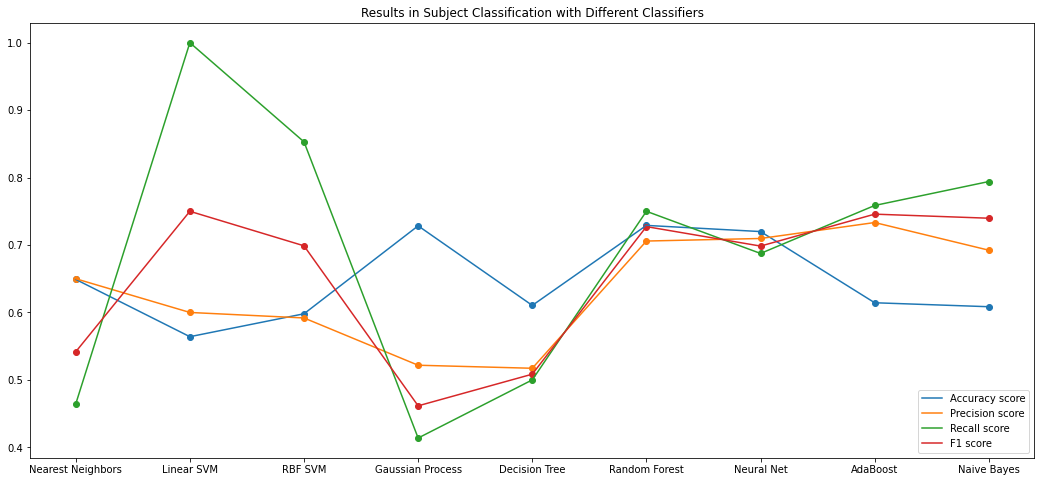

In [172]:
fig, ax = plt.subplots(figsize=(18,8))

ax.plot(names, accuracy, label='Accuracy score')
ax.plot(names, precision, label='Precision score')
ax.plot(names, recall, label='Recall score')
ax.plot(names, f1, label='F1 score')

ax.scatter(names, accuracy)
ax.scatter(names, precision)
ax.scatter(names, recall)
ax.scatter(names, f1)
ax.legend(loc="lower right", frameon=True)

ax.set_title("Results in Subject Classification with Different Classifiers");

In [175]:
df['subject'].value_counts().head(30)

180    120
314    118
215    117
288    117
128    116
192    114
043    113
016    112
259    111
196    110
063    110
207    109
181    108
001    106
152    106
285    104
007    103
217    103
179    102
137    102
244    102
249    101
154    100
004    100
107     98
331     97
120     96
298     94
216     93
261     92
Name: subject, dtype: int64